# Labelize Algorithm

## Briefing

We prepare a dateset consisting of two random sets of geometric points in the geojson format: *PointGeomFigure* and *TextPointGeomFigure*/

The goal of the algorithm is to pair the points with the text and return the text in place of the point/

## Imports

In [291]:
import numpy as np
import pandas as pd
from scipy.spatial import distance, KDTree


import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

## Data preparation

In [292]:
exact_points = pd.read_excel("exactpoints.xlsx")
text_points = pd.read_excel("textpoints.xlsx")

exact_points.reset_index(inplace=True)
text_points.reset_index(inplace=True)

exact_points= exact_points.rename(columns = {'index':'ID_point'})
text_points= text_points.rename(columns = {'index':'ID_text'})

exact_points['key'] = 1
text_points['key'] = 1

print(exact_points.head())
print(text_points.head())

   ID_point  e_x  e_y e_geo_type  key
0         0   63   61      Point    1
1         1   48   32      Point    1
2         2    9   92      Point    1
3         3   54   27      Point    1
4         4    1   22      Point    1
   ID_text  t_x  t_y t_geo_type      text  key
0        0   93   45  TextPoint    Robert    1
1        1   20   88  TextPoint     Lilly    1
2        2   41   19  TextPoint  Jennifer    1
3        3   56   87  TextPoint      Mike    1
4        4   45    1  TextPoint    Robert    1


<AxesSubplot:xlabel='t_x', ylabel='t_y'>

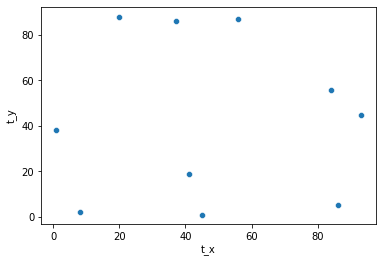

In [293]:



sns.scatterplot(data = text_points, x = 't_x', y = 't_y')

In [294]:
compare_points = pd.merge(exact_points, text_points, on='key')[['ID_point', 'e_x', 'e_y', 'ID_text','t_x', 't_y', 't_geo_type', 'text']]

In [295]:
compare_points

,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text
0,0,63,61,0,93,45,TextPoint,Robert
1,0,63,61,1,20,88,TextPoint,Lilly
2,0,63,61,2,41,19,TextPoint,Jennifer
3,0,63,61,3,56,87,TextPoint,Mike
4,0,63,61,4,45,1,TextPoint,Robert
...,...,...,...,...,...,...,...,...
95,9,63,11,5,1,38,TextPoint,Lilly
96,9,63,11,6,37,86,TextPoint,Robert
97,9,63,11,7,84,56,TextPoint,Robert
98,9,63,11,8,86,5,TextPoint,Jennifer


In [296]:
compare_points['range'] = ((compare_points['e_x'] - compare_points['t_x']) ** 2 +
                              (compare_points['e_y'] - compare_points['t_y']) ** 2) ** (1/2)
compare_points

,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,0,63,61,0,93,45,TextPoint,Robert,34.000000
1,0,63,61,1,20,88,TextPoint,Lilly,50.774009
2,0,63,61,2,41,19,TextPoint,Jennifer,47.413078
3,0,63,61,3,56,87,TextPoint,Mike,26.925824
4,0,63,61,4,45,1,TextPoint,Robert,62.641839
...,...,...,...,...,...,...,...,...,...
95,9,63,11,5,1,38,TextPoint,Lilly,67.623960
96,9,63,11,6,37,86,TextPoint,Robert,79.378838
97,9,63,11,7,84,56,TextPoint,Robert,49.658836
98,9,63,11,8,86,5,TextPoint,Jennifer,23.769729


In [297]:
compare_points.sort_values(by=['range'], ascending=True, inplace=True)
compare_points.reset_index(inplace=True)

In [298]:
compare_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,62,6,35,25,2,41,19,TextPoint,Jennifer,8.485281
1,83,8,58,78,3,56,87,TextPoint,Mike,9.219544
2,73,7,65,84,3,56,87,TextPoint,Mike,9.486833
3,58,5,80,13,8,86,5,TextPoint,Jennifer,10.000000
4,21,2,9,92,1,20,88,TextPoint,Lilly,11.704700
...,...,...,...,...,...,...,...,...,...,...
95,51,5,80,13,1,20,88,TextPoint,Lilly,96.046864
96,20,2,9,92,0,93,45,TextPoint,Robert,96.254870
97,24,2,9,92,4,45,1,TextPoint,Robert,97.862148
98,79,7,65,84,9,8,2,TextPoint,Robert,99.864909


In [299]:
closest_points = pd.DataFrame(columns=compare_points.columns)
closest_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range


In [300]:
for row in compare_points.itertuples():
    first_row = tuple(compare_points.iloc[0])
    point_id = first_row[1]
    text_id = first_row[4]    
    closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
    print("first_row")
    print(first_row)
    print(" ")
    print("************************")
    print(" ")
    compare_points.drop(compare_points[(compare_points['ID_point'] == point_id) | (compare_points['ID_text'] == text_id)].index, inplace = True)
    print("compare_points") 
    print(compare_points)
    print(" ")
    print("************************")
    print(" ")
    print("closest_points")
    print(closest_points)
    print(" ")
    print("************************")
    print(" ")

first_row
(62, 6, 35, 25, 2, 41, 19, 'TextPoint', 'Jennifer', 8.48528137423857)
 
************************
 
compare_points
    index  ID_point  e_x  e_y  ID_text  t_x  t_y t_geo_type      text  \
1      83         8   58   78        3   56   87  TextPoint      Mike   
2      73         7   65   84        3   56   87  TextPoint      Mike   
3      58         5   80   13        8   86    5  TextPoint  Jennifer   
4      21         2    9   92        1   20   88  TextPoint     Lilly   
7      45         4    1   22        5    1   38  TextPoint     Lilly   
..    ...       ...  ...  ...      ...  ...  ...        ...       ...   
95     51         5   80   13        1   20   88  TextPoint     Lilly   
96     20         2    9   92        0   93   45  TextPoint    Robert   
97     24         2    9   92        4   45    1  TextPoint    Robert   
98     79         7   65   84        9    8    2  TextPoint    Robert   
99     28         2    9   92        8   86    5  TextPoint  Jennifer   


C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Loc

IndexError: single positional indexer is out-of-bounds

In [301]:
closest_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,62,6,35,25,2,41,19,TextPoint,Jennifer,8.485281
1,83,8,58,78,3,56,87,TextPoint,Mike,9.219544
2,58,5,80,13,8,86,5,TextPoint,Jennifer,10.0
3,21,2,9,92,1,20,88,TextPoint,Lilly,11.7047
4,45,4,1,22,5,1,38,TextPoint,Lilly,16.0
5,94,9,63,11,4,45,1,TextPoint,Robert,20.59126
6,7,0,63,61,7,84,56,TextPoint,Robert,21.587033
7,76,7,65,84,6,37,86,TextPoint,Robert,28.071338
8,30,3,54,27,0,93,45,TextPoint,Robert,42.953463
9,19,1,48,32,9,8,2,TextPoint,Robert,50.0


In [270]:
closest_points.drop_duplicates(keep='first', inplace = True)

In [248]:
closest_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,62,6,35,25,2,41,19,TextPoint,Jennifer,8.485281
26,83,8,58,78,3,56,87,TextPoint,Mike,9.219544
59,58,5,80,13,8,86,5,TextPoint,Jennifer,10.0
68,94,9,63,11,4,45,1,TextPoint,Robert,20.59126
